In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import folium
import keplergl
import pandas_profiling as pp
import dtale
import pygwalker as pyg
pd.options.display.float_format = '{:20,.2f}'.format
pd.options.plotting.backend = 'plotly'

2023-08-23 15:44:58,676 [16572] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-1-8b46bbc2af71>:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp

INFO: Running in offline mode. There might be newer releases available. Please check at https://github.com/Kanaries/pygwalker or https://pypi.org/project/pygwalker.


In [2]:
df = pd.read_csv(r"C:\Users\daffa\OneDrive\Desktop\datasets\CO2 Emissions.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
df.drop(
    ['Make', 'Model', 'Transmission','Fuel Type'],
    axis = 'columns',
    inplace = True
)
df.head()

,Vehicle Class,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,COMPACT,2.00,4,9.90,6.70,8.50,33,196
1,COMPACT,2.40,4,11.20,7.70,9.60,29,221
2,COMPACT,1.50,4,6.00,5.80,5.90,48,136
3,SUV - SMALL,3.50,6,12.70,9.10,11.10,25,255
4,SUV - SMALL,3.50,6,12.10,8.70,10.60,27,244


In [7]:
data_with_dummis = df.copy()
data_to_dummis = ['Vehicle Class']
perfix_for_data = ['Cls']
for col, per in zip(data_to_dummis, perfix_for_data):
  dummi = pd.get_dummies(data_with_dummis[col], prefix=per, drop_first=True)
  data_with_dummis = data_with_dummis.join(dummi)
    
labels = data_with_dummis['CO2 Emissions(g/km)']

data_to_drop = data_to_dummis+['CO2 Emissions(g/km)']

data_to_drop 

['Vehicle Class', 'CO2 Emissions(g/km)']

In [8]:
final_data = data_with_dummis.drop(data_to_drop, axis=1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    7385 non-null   float64
 1   Cylinders                         7385 non-null   int64  
 2   Fuel Consumption City (L/100 km)  7385 non-null   float64
 3   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 4   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 5   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 6   Cls_FULL-SIZE                     7385 non-null   bool   
 7   Cls_MID-SIZE                      7385 non-null   bool   
 8   Cls_MINICOMPACT                   7385 non-null   bool   
 9   Cls_MINIVAN                       7385 non-null   bool   
 10  Cls_PICKUP TRUCK - SMALL          7385 non-null   bool   
 11  Cls_PICKUP TRUCK - STANDARD       7385 non-null   bool   
 12  Cls_SP

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [13]:
X_train, X_test, y_train, y_test = train_test_split(final_data, labels, test_size= 0.3, random_state=42)

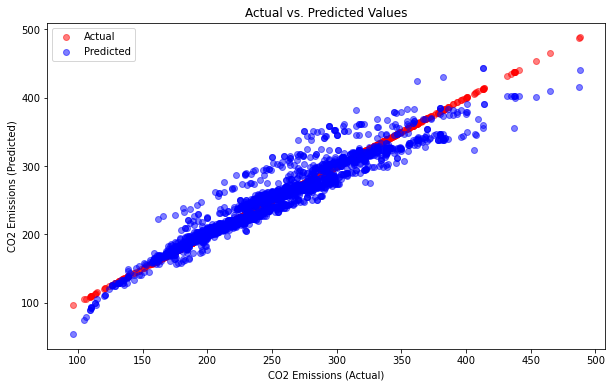

LR Score:  0.9142484906371857
Cross-validation scores: [0.88448593 0.9078977  0.92501445 0.90342526 0.92791034]
Mean CV score: 0.909746734424718
Residual sum of squares (MSE): 289.64


In [17]:
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_test,y_test)
import matplotlib.pyplot as plt


y_pred = lr.predict(X_test)

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.5)

plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.5)

plt.title("Actual vs. Predicted Values")
plt.xlabel("CO2 Emissions (Actual)")
plt.ylabel("CO2 Emissions (Predicted)")
plt.legend()
plt.show()

cv_scores = cross_val_score(lr, final_data, labels, cv=5) 

print("LR Score: ",lr.score(X_test, y_test))
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))

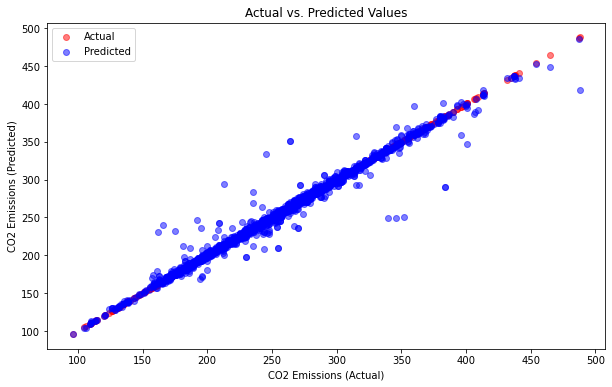

Random Forest Score:  0.9794670341764301
Cross-validation scores: [0.94906751 0.98520183 0.9791987  0.99253017 0.99076545]
Mean CV score: 0.9793527317451133
Residual sum of squares (MSE): 69.35


In [18]:
rf = RandomForestRegressor().fit(X_train, y_train)
rf.score(X_test,y_test)
import matplotlib.pyplot as plt


y_pred = rf.predict(X_test)

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.5)

plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.5)

plt.title("Actual vs. Predicted Values")
plt.xlabel("CO2 Emissions (Actual)")
plt.ylabel("CO2 Emissions (Predicted)")
plt.legend()
plt.show()

cv_scores = cross_val_score(rf, final_data, labels, cv=5) 

print("Random Forest Score: ",rf.score(X_test, y_test))
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))

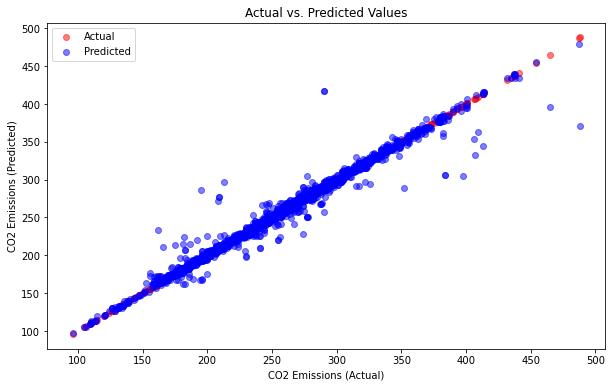

KN Regressor Score:  0.9745127594617667
Cross-validation scores: [0.95495107 0.97682461 0.98564828 0.97882892 0.97957683]
Mean CV score: 0.9751659408264954
Residual sum of squares (MSE): 86.09


In [20]:
kn = KNeighborsRegressor().fit(X_train, y_train)

import matplotlib.pyplot as plt


y_pred = kn.predict(X_test)

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.5)

plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.5)

plt.title("Actual vs. Predicted Values")
plt.xlabel("CO2 Emissions (Actual)")
plt.ylabel("CO2 Emissions (Predicted)")
plt.legend()
plt.show()

cv_scores = cross_val_score(kn, final_data, labels, cv=5) 
print("KN Regressor Score: ",kn.score(X_test, y_test))
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))